### Import Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [4]:
import torch
from torchvision import datasets, transforms, models  # datsets  , transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F
from datetime import datetime

In [7]:
!pip install nb_black

  Using cached nb_black-1.0.7.tar.gz (4.8 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached black-24.4.0-cp311-cp311-win_amd64.whl.metadata (76 kB)
  Using cached mypy_extensions-1.0.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached pathspec-0.12.1-py3-none-any.whl.metadata (21 kB)
Using cached black-24.4.0-cp311-cp311-win_amd64.whl (1.4 MB)
Using cached mypy_extensions-1.0.0-py3-none-any.whl (4.7 kB)
Using cached pathspec-0.12.1-py3-none-any.whl (31 kB)
  Running setup.py clean for nb_black
Failed to build nb_black


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [87 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib
      copying nb_black.py -> build\lib
      copying lab_black.py -> build\lib
      C:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      installing to build\bdist.win-amd64\wheel
      running install
      running install_lib
      creating build\bdist.win-amd64
      creating build\bdist.win-amd64\wheel
      copying build\lib\lab_black.py -> build\bdist.win-amd64\wheel\.
      copying build\lib\nb_black.py -> build\bdist.win-amd64\wheel\.
      running install_egg_info
      running egg_info
      writing nb_black.egg-info\PKG-INFO
    

In [8]:
if torch.cuda.is_available():
    device = torch.device('cuda')

In [9]:
x= torch.tensor([1,2], device=device)

In [10]:
print(x.device)

cuda:0


### Import Dataset

<b> Dataset Link (Plant Vliiage Dataset ):</b><br> <a href='https://data.mendeley.com/datasets/tywbtsjrjv/1'> https://data.mendeley.com/datasets/tywbtsjrjv/1 </a>

In [11]:
transform = transforms.Compose(
    [transforms.Resize(255), transforms.CenterCrop(224), transforms.ToTensor()]
)

In [12]:
dataset = datasets.ImageFolder("plant leaf dataset", transform=transform)

In [13]:
dataset

Dataset ImageFolder
    Number of datapoints: 16174
    Root location: plant leaf dataset
    StandardTransform
Transform: Compose(
               Resize(size=255, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(224, 224))
               ToTensor()
           )

In [14]:
indices = list(range(len(dataset)))

In [15]:
split = int(np.floor(0.85 * len(dataset)))  # train_size

In [16]:
validation = int(np.floor(0.70 * split))  # validation

In [17]:
print(0, validation, split, len(dataset))

0 9622 13747 16174


In [18]:
print(f"length of train size :{validation}")
print(f"length of validation size :{split - validation}")
print(f"length of test size :{len(dataset)-validation}")

length of train size :9622
length of validation size :4125
length of test size :6552


In [19]:
np.random.shuffle(indices)

### Split into Train and Test

In [20]:
train_indices, validation_indices, test_indices = (
    indices[:validation],
    indices[validation:split],
    indices[split:],
)

In [21]:
train_sampler = SubsetRandomSampler(train_indices)
validation_sampler = SubsetRandomSampler(validation_indices)
test_sampler = SubsetRandomSampler(test_indices)

In [22]:
targets_size = len(dataset.class_to_idx)

### Model

<b>Convolution Aithmetic Equation : </b>(W - F + 2P) / S + 1 <br>
W = Input Size<br>
F = Filter Size<br>
P = Padding Size<br>
S = Stride <br>

### Transfer Learning

In [23]:
# model = models.vgg16(pretrained=True)

In [24]:
# for params in model.parameters():
#     params.requires_grad = False

In [25]:
# model

In [26]:
# n_features = model.classifier[0].in_features
# n_features

In [27]:
# model.classifier = nn.Sequential(
#     nn.Linear(n_features, 1024),
#     nn.ReLU(),
#     nn.Dropout(0.4),
#     nn.Linear(1024, targets_size),
# )

In [28]:
# model

### Original Modeling

In [29]:
class CNN(nn.Module):
    def __init__(self, K):
        super(CNN, self).__init__()
        self.conv_layers = nn.Sequential(
            # conv1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),
            # conv2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
            # conv3
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
            # conv4
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2),
        )

        self.dense_layers = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(50176, 1024),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(1024, K),
        )

    def forward(self, X):
        out = self.conv_layers(X)

        # Flatten
        out = out.view(-1, 50176)

        # Fully connected
        out = self.dense_layers(out)

        return out

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [31]:
#device = "cpu"

In [32]:
print(device)

cuda


In [33]:
model = CNN(targets_size)

In [34]:
model.to(device)

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

In [35]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [36]:
from torchsummary import summary

#model = model.to('cuda')  # Move model to GPU
#input_data = torch.randn(1, 3, 224, 224).to('cuda')  # Example input data on GPU
summary(model, (3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
              ReLU-2         [-1, 32, 224, 224]               0
       BatchNorm2d-3         [-1, 32, 224, 224]              64
            Conv2d-4         [-1, 32, 224, 224]           9,248
              ReLU-5         [-1, 32, 224, 224]               0
       BatchNorm2d-6         [-1, 32, 224, 224]              64
         MaxPool2d-7         [-1, 32, 112, 112]               0
            Conv2d-8         [-1, 64, 112, 112]          18,496
              ReLU-9         [-1, 64, 112, 112]               0
      BatchNorm2d-10         [-1, 64, 112, 112]             128
           Conv2d-11         [-1, 64, 112, 112]          36,928
             ReLU-12         [-1, 64, 112, 112]               0
      BatchNorm2d-13         [-1, 64, 112, 112]             128
        MaxPool2d-14           [-1, 64,

In [37]:
criterion = nn.CrossEntropyLoss()  # this include softmax + cross entropy loss
optimizer = torch.optim.Adam(model.parameters())

### Batch Gradient Descent

In [38]:
import numpy as np
from datetime import datetime

device = 'cuda' if torch.cuda.is_available() else 'cpu'

def batch_gd(model, criterion, train_loader, validation_loader, epochs, optimizer):
    train_losses = np.zeros(epochs)
    validation_losses = np.zeros(epochs)

    for e in range(epochs):
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()

            output = model(inputs)

            loss = criterion(output, targets)

            train_loss.append(loss.item())  # torch to numpy world

            loss.backward()
            optimizer.step()

        train_loss = np.mean(train_loss)

        validation_loss = []

        for inputs, targets in validation_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            output = model(inputs)

            loss = criterion(output, targets)

            validation_loss.append(loss.item())  # torch to numpy world

        validation_loss = np.mean(validation_loss)

        train_losses[e] = train_loss
        validation_losses[e] = validation_loss

        dt = datetime.now() - t0

        print(
            f"Epoch : {e+1}/{epochs} Train_loss:{train_loss:.3f} Validation_loss:{validation_loss:.3f} Duration:{dt}"
        )

    return train_losses, validation_losses


In [39]:
#device = "cpu"
print(device)

cuda


In [40]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=train_sampler
)
test_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=test_sampler
)
validation_loader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, sampler=validation_sampler
)

In [41]:
'''train_losses, validation_losses = batch_gd(
    model, criterion, train_loader, vaidation_loader, 5
)
'''

epochs = 15  # Define the number of epochs
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

train_losses, validation_losses = batch_gd(
    model, criterion, train_loader, validation_loader, epochs, optimizer
)


Epoch : 1/15 Train_loss:0.700 Validation_loss:0.642 Duration:0:24:12.282964
Epoch : 2/15 Train_loss:0.252 Validation_loss:0.377 Duration:0:39:16.807907
Epoch : 3/15 Train_loss:0.149 Validation_loss:0.239 Duration:0:46:23.012268
Epoch : 4/15 Train_loss:0.087 Validation_loss:0.149 Duration:0:33:38.514145
Epoch : 5/15 Train_loss:0.064 Validation_loss:0.160 Duration:0:33:09.406037
Epoch : 6/15 Train_loss:0.043 Validation_loss:0.144 Duration:0:32:06.687188
Epoch : 7/15 Train_loss:0.038 Validation_loss:0.108 Duration:0:41:57.979819
Epoch : 8/15 Train_loss:0.025 Validation_loss:0.148 Duration:0:43:05.253558
Epoch : 9/15 Train_loss:0.022 Validation_loss:0.122 Duration:0:33:22.509601
Epoch : 10/15 Train_loss:0.015 Validation_loss:0.158 Duration:0:33:19.001492
Epoch : 11/15 Train_loss:0.010 Validation_loss:0.097 Duration:0:33:20.459140
Epoch : 12/15 Train_loss:0.011 Validation_loss:0.106 Duration:0:33:35.597344
Epoch : 13/15 Train_loss:0.007 Validation_loss:0.178 Duration:0:33:22.192944
Epoch : 

### Save the Model

In [42]:
torch.save(model.state_dict(), 'plant_disease_model_2.pt')


### Load Model

In [43]:
targets_size = 14
model = CNN(targets_size)
model.load_state_dict(torch.load("plant_disease_model_2.pt"))
model.eval()

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

In [44]:
# %matplotlib notebook

### Plot the loss

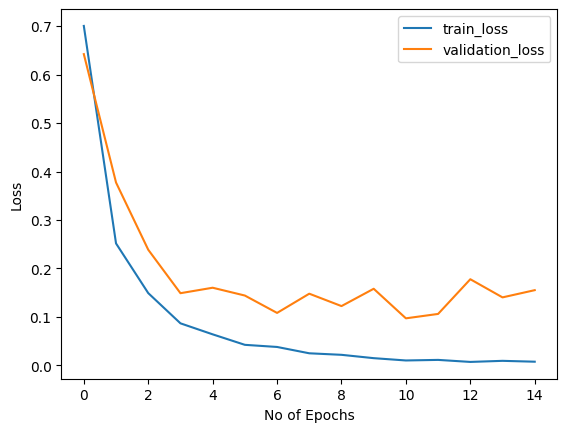

In [45]:
plt.plot(train_losses , label = 'train_loss')
plt.plot(validation_losses , label = 'validation_loss')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Accuracy

In [59]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def accuracy(loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)  # Move data to the same device
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return (100 * correct / total)


In [60]:
train_acc = accuracy(train_loader)
test_acc = accuracy(test_loader)
validation_acc = accuracy(validation_loader)

In [61]:
print(
    f"Train Accuracy : {train_acc}\nTest Accuracy : {test_acc}\nValidation Accuracy : {validation_acc}"
)

Train Accuracy : 99.43878611515278
Test Accuracy : 95.87968685620108
Validation Accuracy : 96.65454545454546


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


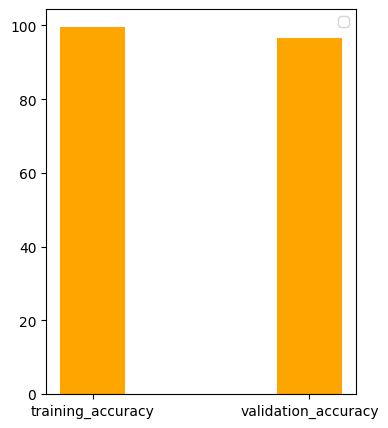

In [78]:
accuracy = {'training_accuracy':train_acc,'validation_accuracy':validation_acc}
acc = list(accuracy.keys())
scores = list(accuracy.values())

fig = plt.figure(figsize = (4, 5))
plt.bar(acc, scores, color ='orange', 
        width = 0.3)
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

### Single Image Prediction

In [48]:
transform_index_to_disease = dataset.class_to_idx

In [49]:
transform_index_to_disease = dict(
    [(value, key) for key, value in transform_index_to_disease.items()]
)  # reverse the index

In [50]:
data = pd.read_csv("C:\\Plant Disease Detection\\plant leaf dataset-20240328T092501Z-001\\disease_info.csv", encoding="cp1252")

In [51]:
from PIL import Image
import torchvision.transforms.functional as TF

In [52]:
def single_prediction(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))
    input_data = TF.to_tensor(image)
    input_data = input_data.view((-1, 3, 224, 224))
    output = model(input_data)
    output = output.detach().numpy()
    index = np.argmax(output)
    print("Original : ", image_path[12:-4])
    pred_csv = data["disease_name"][index]
    print(pred_csv)

In [53]:
single_prediction("C:\\Plant Disease Detection\\plant leaf dataset-20240328T092501Z-001\\plant leaf dataset\\Apple___Apple_scab\\image (3).JPG")

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

### Wrong Prediction

In [54]:
single_prediction("C:\Plant Disease Detection\plant leaf dataset-20240328T092501Z-001\plant leaf dataset\Apple___Apple_scab\image (9).JPG")

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [43]:
single_prediction("C:\Plant Disease Detection\plant leaf dataset-20240328T092501Z-001\plant leaf dataset\Blueberry___healthy\image (5).JPG")

Original :  ease Detection\plant leaf dataset-20240328T092501Z-001\plant leaf dataset\Blueberry___healthy\image (5)
Blueberry : Healthy


In [ ]:
single_prediction("test_images/apple_black_rot.JPG")

In [ ]:
single_prediction("test_images/apple_healthy.JPG")

In [ ]:
single_prediction("test_images/background_without_leaves.jpg")

In [ ]:
single_prediction("test_images/blueberry_healthy.JPG")

In [ ]:
single_prediction("test_images/cherry_healthy.JPG")

In [ ]:
single_prediction("test_images/cherry_powdery_mildew.JPG")

In [ ]:
single_prediction("test_images/corn_cercospora_leaf.JPG")

In [ ]:
single_prediction("test_images/corn_common_rust.JPG")

In [ ]:
single_prediction("test_images/corn_healthy.jpg")

In [ ]:
single_prediction("test_images/corn_northen_leaf_blight.JPG")

In [ ]:
single_prediction("test_images/grape_black_rot.JPG")

In [ ]:
single_prediction("test_images/grape_healthy.JPG")

In [ ]:
single_prediction("test_images/grape_leaf_blight.JPG")

In [ ]:
single_prediction("test_images/orange_haunglongbing.JPG")

In [ ]:
single_prediction("test_images/peach_bacterial_spot.JPG")

In [ ]:
single_prediction("test_images/peach_healthy.JPG")

In [ ]:
single_prediction("test_images/pepper_bacterial_spot.JPG")

In [ ]:
single_prediction("test_images/pepper_bell_healthy.JPG")

In [ ]:
single_prediction("test_images/potato_early_blight.JPG")

In [ ]:
single_prediction("test_images/potato_healthy.JPG")

In [ ]:
single_prediction("test_images/potato_late_blight.JPG")

In [ ]:
single_prediction("test_images/raspberry_healthy.JPG")

In [ ]:
single_prediction("test_images/soyaben healthy.JPG")

In [ ]:
single_prediction("test_images/potato_late_blight.JPG")

In [ ]:
single_prediction("test_images/squash_powdery_mildew.JPG")

In [ ]:
single_prediction("test_images/starwberry_healthy.JPG")

In [ ]:
single_prediction("test_images/starwberry_leaf_scorch.JPG")

In [ ]:
single_prediction("test_images/tomato_bacterial_spot.JPG")

In [ ]:
single_prediction("test_images/tomato_early_blight.JPG")

In [ ]:
single_prediction("test_images/tomato_healthy.JPG")

In [ ]:
single_prediction("test_images/tomato_late_blight.JPG")

In [ ]:
single_prediction("test_images/tomato_leaf_mold.JPG")

In [ ]:
single_prediction("test_images/tomato_mosaic_virus.JPG")

In [ ]:
single_prediction("test_images/tomato_septoria_leaf_spot.JPG")

In [ ]:
single_prediction("test_images/tomato_spider_mites_two_spotted_spider_mites.JPG")

In [ ]:
single_prediction("test_images/tomato_target_spot.JPG")

In [ ]:
single_prediction("test_images/tomato_yellow_leaf_curl_virus.JPG")